 # Assignment 4:
* Mihir Patil
* Swaroop Bhandary
* Erick Kramer

In [56]:
import matplotlib.pyplot as plt
import random
import numpy as np
from copy import copy
from matplotlib.patches import Rectangle


## Consistent learner

A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

Write a consistent learner for Hr from last Exercise (i.e. Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

In [74]:
class Rectangle:
    def __init__(self, max_width, max_height, debug = False):
        self.max_height = max_height
        self.max_width = max_width
        self.debug = debug
        
    def randomRectangles(self):
        '''
            Generates a random rectangle specifying the origin point, the width and height
        '''
        self.pointA_x = random.randint(1,50)
        self.pointA_y = self.pointA_x
        self.randomHeight = random.randint(10,self.max_height)
        self.randomWidth = random.randint(10,self.max_width)
        self.xLim = 100
        self.yLim = 100 
        self.xOrigin = 0
        self.yOrigin = 0
                
        print('Rectangle with an origin at {},{} and height of {} and widht of {}'\
                          .format(self.pointA_x, self.pointA_y,self.randomHeight, \
                                  self.randomWidth))       
        
        return plt.Rectangle((self.pointA_x,self.pointA_y), self.randomWidth, \
                             self.randomHeight, angle=0.0, \
                             facecolor='none', edgecolor='r', linewidth=3)
    
    def dataRandomGenerator(self, numPoints):
        '''
            Generates random data uniformly distributed
        '''
        dataX = np.random.uniform(self.xOrigin, self.xLim, numPoints)
        dataY = np.random.uniform(self.yOrigin, self.yLim, numPoints)
        return dataX, dataY
    
    def dataClassification(self, dataX, dataY):
        '''
            Classify whether the data points are inside or outside the rectangle 
        '''
        assert(len(dataX) == len(dataY)), "Number of data points do not match"
        
        dataX_in = []
        dataY_in = []
        dataX_out = []
        dataY_out = []
        
        if self.debug: print("Number of data points: ", len(dataX))
            
        for point in range(len(dataX)):
            if ((dataX[point] > self.pointA_x) and \
               (dataX[point] < (self.pointA_x + self.randomWidth)) and \
               (dataY[point] > self.pointA_y) and \
               (dataY[point] < (self.pointA_y + self.randomHeight))):

                dataX_in.append(dataX[point])
                dataY_in.append(dataY[point])
                
                assert(len(dataX_in) == len(dataY_in)), \
                    "Number of data points inside do not match"
                
                if self.debug: print("Point inside has x = {} and y = {}: "\
                                     .format(dataX[point], dataY[point]))
            
            else:
            
                dataX_out.append(dataX[point])
                dataY_out.append(dataY[point])
                assert(len(dataX_out) == len(dataY_out)), \
                    "Number of data points outside do not match"      
                
        return dataX_in, dataY_in, dataX_out, dataY_out
    
    def competeLearner(self, dataX_in, dataY_in):
        '''
            Find the smallest rectangle than fit the current data points inside the concept
            rectangle
        '''
        leftBound = min(dataX_in)
        rightBound = max(dataX_in)
        lowerBound = min(dataY_in)
        upperBound = max(dataY_in)
        width = rightBound - leftBound
        height = upperBound - lowerBound
        
        if self.debug: print('Rectangle with an origin at {},{} and height of {} and widht of {}'\
                                     .format(leftBound,lowerBound, width, height))
        
        rect = plt.Rectangle((leftBound,lowerBound), width, \
                             height, angle=0.0, \
                             facecolor='none', edgecolor='k', linewidth=3)
        learnedRectComponents = [leftBound, rightBound, lowerBound, upperBound]
        
        return rect, learnedRectComponents
    
    def learnedPoints(self, dataX_in, dataY_in, learnedRectComponents):
        numPointsLearned = 0
        leftBound = learnedRectComponents[0]
        rightBound = learnedRectComponents[1]
        lowerBound = learnedRectComponents[2]
        upperBound = learnedRectComponents[3]
        assert(len(dataX_in) == len(dataY_in)), "Number of data points do not match"
        
        for point in range(len(dataX_in)):
            if ((dataX_in[point] >= leftBound) and \
               (dataX_in[point] <= rightBound) and \
               (dataY_in[point] >= lowerBound) and \
               (dataY_in[point] <= upperBound)):

                numPointsLearned += 1
        print("The number of points fully learned are {} from a total of {}"\
                  .format(numPointsLearned, len(dataX_in)))
        error = 1 - numPointsLearned/len(dataX_in)
        
        return error

Rectangle with an origin at 43,43 and height of 28 and widht of 27
The number of points fully learned are 2 from a total of 7
The compete learner has an error of 0.7142857142857143 when 100 new points were created
Original data points


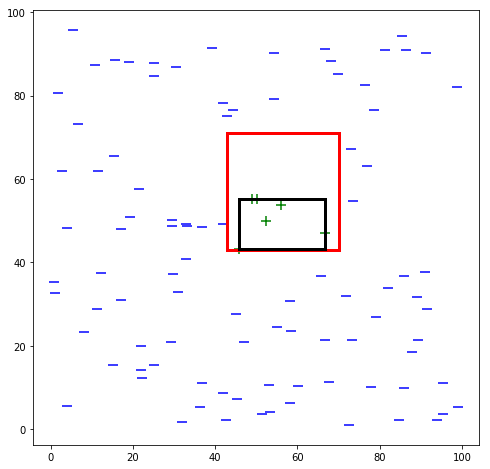

New data points


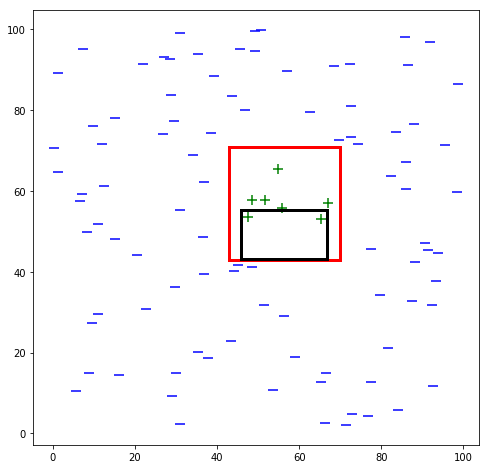

In [79]:
# Rectangle class (maxWidht, maxHeight)
rect = Rectangle(80,40)
numPoints = 100

# Generate random rectangle
rec = rect.randomRectangles()

# Generate random data points
dataX, dataY = rect.dataRandomGenerator(numPoints)

# Classify the datapoints
dataX_in, dataY_in, dataX_out, dataY_out = rect.dataClassification(dataX, dataY)

# Find the smallest rectangle that fit the data points inside
rec_learned, learnedRectComponents = rect.competeLearner(dataX_in, dataY_in)

# Generate new data points
dataX_new, dataY_new = rect.dataRandomGenerator(numPoints)

# Classify the new datapoints
dataX_in_new, dataY_in_new, dataX_out_new, dataY_out_new = \
    rect.dataClassification(dataX_new, dataY_new)

# Count the number of points that are inside but not covered by the learned rectangle
error = rect.learnedPoints(dataX_in_new, dataY_in_new, learnedRectComponents)

print("The compete learner has an error of {} when {} new points were created"\
      .format(error, len(dataX)))

rec_cp =  copy(rec)
rec_learned_cp = copy(rec_learned)

print('==============================================================')
print('Original data points')
print('==============================================================')


fig = plt.figure(figsize=(8,8))   
ax1 = fig.add_subplot(111)

ax1.axis('auto')
ax1.scatter(dataX_in, dataY_in, marker='+', c='g',s=100)
ax1.scatter(dataX_out, dataY_out, marker='_', c='b',s=100)
ax1.add_patch(rec)
ax1.add_patch(rec_learned)
plt.show()

rec.remove()
rec_learned.remove()

print('==============================================================')
print('New data points')
print('==============================================================')

fig2 = plt.figure(figsize=(8,8))   
ax2 = fig2.add_subplot(111)
ax2.axis('auto')
ax2.scatter(dataX_in_new, dataY_in_new, marker='+', c='g',s=100)
ax2.scatter(dataX_out_new, dataY_out_new, marker='_', c='b',s=100)
ax2.add_patch(rec_cp)
ax2.add_patch(rec_learned_cp)
plt.show()



Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

Rectangle with an origin at 4,4 and height of 16 and widht of 62
The number of points fully learned are 9 from a total of 10
Rectangle with an origin at 45,45 and height of 10 and widht of 61
The number of points fully learned are 10 from a total of 15
Rectangle with an origin at 35,35 and height of 33 and widht of 74
The number of points fully learned are 60 from a total of 67
Rectangle with an origin at 46,46 and height of 29 and widht of 44
The number of points fully learned are 51 from a total of 54
Rectangle with an origin at 44,44 and height of 32 and widht of 11
The number of points fully learned are 23 from a total of 26
Rectangle with an origin at 32,32 and height of 16 and widht of 56
The number of points fully learned are 41 from a total of 45
Rectangle with an origin at 15,15 and height of 28 and widht of 70
The number of points fully learned are 134 from a total of 140
Rectangle with an origin at 23,23 and height of 38 and widht of 24
The number of points fully learned are

The number of points fully learned are 1008 from a total of 1015
Rectangle with an origin at 20,20 and height of 16 and widht of 54
The number of points fully learned are 585 from a total of 589
Rectangle with an origin at 39,39 and height of 36 and widht of 19
The number of points fully learned are 461 from a total of 463
Rectangle with an origin at 5,5 and height of 20 and widht of 75
The number of points fully learned are 1072 from a total of 1076
Rectangle with an origin at 23,23 and height of 38 and widht of 47
The number of points fully learned are 1297 from a total of 1299
Rectangle with an origin at 24,24 and height of 24 and widht of 40
The number of points fully learned are 706 from a total of 709
Rectangle with an origin at 5,5 and height of 24 and widht of 47
The number of points fully learned are 803 from a total of 809
Rectangle with an origin at 50,50 and height of 12 and widht of 10
The number of points fully learned are 80 from a total of 86
Rectangle with an origin at

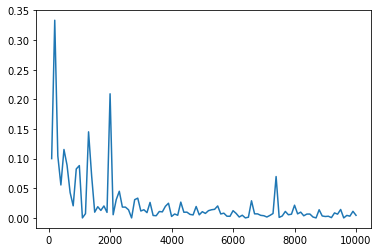

In [81]:
rect = Rectangle(80,40)
numPoints = 100
error_results = []
numPoints_list = []

for i in range(100):
    # Generate random rectangle
    rec = rect.randomRectangles()

    # Generate random data points
    dataX, dataY = rect.dataRandomGenerator(numPoints)

    # Classify the datapoints
    dataX_in, dataY_in, dataX_out, dataY_out = rect.dataClassification(dataX, dataY)

    # Find the smallest rectangle that fit the data points inside
    rec_learned, learnedRectComponents = rect.competeLearner(dataX_in, dataY_in)

    # Generate new data points
    dataX_new, dataY_new = rect.dataRandomGenerator(numPoints)

    # Classify the new datapoints
    dataX_in_new, dataY_in_new, dataX_out_new, dataY_out_new = \
        rect.dataClassification(dataX_new, dataY_new)

    # Count the number of points that are inside but not covered by the learned rectangle
    error = rect.learnedPoints(dataX_in_new, dataY_in_new, learnedRectComponents)
    
    error_results.append(error)
    numPoints_list.append(numPoints)
    
    numPoints += 100

plt.plot(numPoints_list, error_results)

Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic?

The VC dimension is m+1, where m is the number of inputs. There are 2 inputs. Hence VC dimension is 3. <br/>

$m >= \frac{(4*ln_2(2/\delta ) + 8*VCdim(H)*ln_2( 13/\epsilon ))}{\epsilon}$ <br/>

Here, $\delta$ = 0.1 and $\epsilon$ = 0.05 <br/>

$m >= \frac{(4*ln_2(2/0.1 ) + 8**ln_2( 13/0.05 ))}{0.05}$ <br/>

Hence m is 1899

In [1]:
import math
print (4*math.log10(2/0.05)/math.log10(2) + 8*3*math.log10(13/0.1)/math.log10(2))/0.1

1898.24539892


Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),  where a ,b , c , and d  are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane. Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is 1/4 *  n(n+1)^2


a.  Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !

b. Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.

Here, since the number of hypothesis space is finite, we can use the following formula:

m >= $\frac{\ln |H_n| + ln (1/\delta)}{\epsilon}$ where $1-\delta$ is the confidence level, $\epsilon$ is the allowed error and $H_n$ is the number of distinct hypothesis possible

Here, $\delta$ = 0.05, $\epsilon$ = 0.15 and $H_n$ = $\frac{100*101^2}{4}$ = 255025

$m >= \frac{ln (255025) + ln ( 20)}{0.15}$ <br/> 
$m >= 103$

Here, since the number of hypothesis is infinite, we use the following formula:

$m >= \frac{(4*ln_2(2/\delta ) + 8*VCdim(H)*ln_2( 13/\epsilon ))}{\epsilon}$ <br/>
VC dimension for the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d) is 5. <br>
$m >= \frac{(4*ln_2(2/0.05 ) + 8*5*ln_2( 13/0.15 ))}{0.15}$ <br/>
$m >= 1859$